In [72]:
import pandas as pd

In [ ]:
data = pd.read_csv("recap.csv")  
data.tail()

,annee,Nombre d'inscrit,Nombre d'absent,Nombre d'exclue,Moyenne des moyennes finales,Nombre d'admis,Nombre d'admis 1er tour,Nombre d'admis 2e tour,Nombre mention PASS,Nombre mention ABIEN,Nombre mention BIEN,Nombre mention TBIEN
14,2020,155979,5995,26,8.377566,72449,34266,38183,65679,5800,877,94
15,2021,157947,4831,130,8.217776,68742,29840,38902,62566,5260,826,95
16,2022,145665,4995,58,8.612485,73382,34562,38820,65539,6500,1198,155
17,2023,155590,5269,103,8.573969,77469,34280,43189,69246,6666,1420,146
18,2024,159499,4376,247,8.595971,78246,37119,41127,68765,7726,1586,169


In [74]:
data.columns

Index(['annee', 'Nombre d'inscrit', 'Nombre d'absent', 'Nombre d'exclue',
       'Moyenne des moyennes finales', 'Nombre d'admis',
       'Nombre d'admis 1er tour', 'Nombre d'admis 2e tour',
       'Nombre mention PASS', 'Nombre mention ABIEN', 'Nombre mention BIEN',
       'Nombre mention TBIEN'],
      dtype='object')

In [75]:
data.shape

(19, 12)

In [ ]:
#valeur manquante 
data.isnull().sum() 

annee                           0
Nombre d'inscrit                0
Nombre d'absent                 0
Nombre d'exclue                 0
Moyenne des moyennes finales    0
Nombre d'admis                  0
Nombre d'admis 1er tour         0
Nombre d'admis 2e tour          0
Nombre mention PASS             0
Nombre mention ABIEN            0
Nombre mention BIEN             0
Nombre mention TBIEN            0
dtype: int64

In [77]:
# Calcul correct du taux de réussite (en pourcentage)
data['taux_reussite'] = (data['Nombre d\'admis']) / (data['Nombre d\'inscrit'] - data['Nombre d\'absent']) * 100
data['taux_reussite'] = data['taux_reussite'].round(2)

print(data['taux_reussite'])

0     50.10
1     47.79
2     41.66
3     34.74
4     41.78
5     37.97
6     38.09
7     38.00
8     31.10
9     30.89
10    35.59
11    30.84
12    34.98
13    37.37
14    48.30
15    44.90
16    52.17
17    51.54
18    50.44
Name: taux_reussite, dtype: float64


In [85]:
pd.set_option('display.max_columns', None)  
data2014 = data[data['annee'] == 2014]
display(data2014)

,annee,Nombre d'inscrit,Nombre d'absent,Nombre d'exclue,Moyenne des moyennes finales,Nombre d'admis,Nombre d'admis 1er tour,Nombre d'admis 2e tour,Nombre mention PASS,Nombre mention ABIEN,Nombre mention BIEN,Nombre mention TBIEN,taux_reussite
8,2014,127766,324,50,7.507007,39638,15348,24290,37236,2121,258,23,31.1


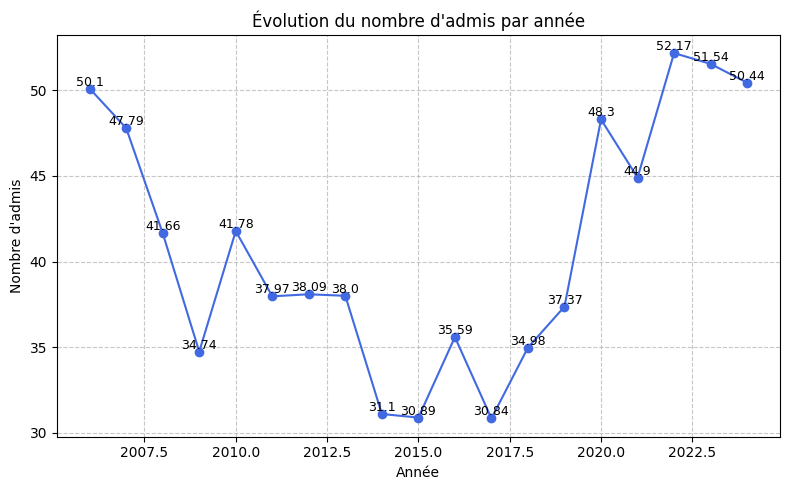

In [79]:
#courbe  pour voir si le nombre d 'admission est constant
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.plot(data['annee'], data["taux_reussite"], marker='o', color='royalblue')
plt.title("Évolution du nombre d'admis par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'admis")
plt.grid(True, linestyle='--', alpha=0.7)
for i, val in enumerate(data["taux_reussite"]):
    plt.text(data['annee'][i], val, str(val), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


In [80]:
#prendre les donne de 2006 a 2013 
data_2006_2013 = data[(data['annee'] >= 2006) & (data['annee'] <= 2013)]
data_2006_2013.columns

Index(['annee', 'Nombre d'inscrit', 'Nombre d'absent', 'Nombre d'exclue',
       'Moyenne des moyennes finales', 'Nombre d'admis',
       'Nombre d'admis 1er tour', 'Nombre d'admis 2e tour',
       'Nombre mention PASS', 'Nombre mention ABIEN', 'Nombre mention BIEN',
       'Nombre mention TBIEN', 'taux_reussite'],
      dtype='object')

modele Arima

In [81]:
from statsmodels.tsa.arima.model import ARIMA    #127766
import numpy as np

#predire le nombre d'inscrit pour 2014
#test plusieurs combinaison de parametre  p ,d,q
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(data_2006_2013["Nombre d'inscrit"], order=(p, d, q))
                model_fit = model.fit()
                pred = model_fit.forecast(steps=1)
                print(f"ARIMA({p},{d},{q}) → Prédiction 2014 : {int(pred.iloc[0])} | AIC : {model_fit.aic:.2f}")
            except Exception as e:
                continue 
            
           

ARIMA(0,0,0) → Prédiction 2014 : 69918 | AIC : 187.82
ARIMA(0,0,1) → Prédiction 2014 : 86703 | AIC : 184.85
ARIMA(0,0,2) → Prédiction 2014 : 94300 | AIC : 187.07
ARIMA(0,1,0) → Prédiction 2014 : 109462 | AIC : 151.97
ARIMA(0,1,1) → Prédiction 2014 : 110923 | AIC : 153.17
ARIMA(0,1,2) → Prédiction 2014 : 112687 | AIC : 153.39
ARIMA(1,0,0) → Prédiction 2014 : 106918 | AIC : 179.37
ARIMA(1,0,1) → Prédiction 2014 : 104873 | AIC : 177.78
ARIMA(1,0,2) → Prédiction 2014 : 103183 | AIC : 188.56


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters

ARIMA(1,1,0) → Prédiction 2014 : 112860 | AIC : 151.09
ARIMA(1,1,1) → Prédiction 2014 : 118965 | AIC : 146.19
ARIMA(1,1,2) → Prédiction 2014 : 119515 | AIC : 147.49
ARIMA(2,0,0) → Prédiction 2014 : 112792 | AIC : 174.49


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,0,1) → Prédiction 2014 : 113450 | AIC : 174.20
ARIMA(2,0,2) → Prédiction 2014 : 103251 | AIC : 190.28
ARIMA(2,1,0) → Prédiction 2014 : 115070 | AIC : 152.46
ARIMA(2,1,1) → Prédiction 2014 : 119422 | AIC : 160.54
ARIMA(2,1,2) → Prédiction 2014 : 120828 | AIC : 149.49


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to con

ici on chosit l'aic le plus petit et la prediction qui s'approche du reel on prend p = 2 , d = 1 q = 2

In [83]:
model = ARIMA(data_2006_2013["Nombre d'inscrit"], order=(2, 1, 2))
model_fit = model.fit() 
pred = model_fit.forecast(steps=1)
print(f"Prédiction pour 2014 : {int(pred.iloc[0])}")

Prédiction pour 2014 : 120828


In [84]:
#score de prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
score = sqrt(mean_squared_error(data_2006_2013["Nombre d'inscrit"], model_fit.fittedvalues))
print(f"Score de prédiction : {score:.2f}")


Score de prédiction : 15626.81


Plus le score est bas meilleur est le modele 

In [86]:
#predire le taux d'admis pour 2014
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(data_2006_2013["taux_reussite"], order=(p, d, q))
                model_fit = model.fit()
                pred = model_fit.forecast(steps=1)
                print(f"ARIMA({p},{d},{q}) → Prédiction reussite 2014 : {int(pred.iloc[0])} | AIC : {model_fit.aic:.2f}")
            except Exception as e:
                continue 

ARIMA(0,0,0) → Prédiction reussite 2014 : 41 | AIC : 52.26
ARIMA(0,0,1) → Prédiction reussite 2014 : 40 | AIC : 52.62
ARIMA(0,0,2) → Prédiction reussite 2014 : 40 | AIC : 53.88
ARIMA(0,1,0) → Prédiction reussite 2014 : 38 | AIC : 43.54
ARIMA(0,1,1) → Prédiction reussite 2014 : 38 | AIC : 45.44
ARIMA(0,1,2) → Prédiction reussite 2014 : 38 | AIC : 47.44
ARIMA(1,0,0) → Prédiction reussite 2014 : 39 | AIC : 52.28
ARIMA(1,0,1) → Prédiction reussite 2014 : 39 | AIC : 54.19
ARIMA(1,0,2) → Prédiction reussite 2014 : 40 | AIC : 56.28
ARIMA(1,1,0) → Prédiction reussite 2014 : 38 | AIC : 45.44


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1) → Prédiction reussite 2014 : 38 | AIC : 47.44
ARIMA(1,1,2) → Prédiction reussite 2014 : 38 | AIC : 49.44
ARIMA(2,0,0) → Prédiction reussite 2014 : 40 | AIC : 54.12
ARIMA(2,0,1) → Prédiction reussite 2014 : 41 | AIC : 55.07


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting pa

ARIMA(2,0,2) → Prédiction reussite 2014 : 42 | AIC : 56.90
ARIMA(2,1,0) → Prédiction reussite 2014 : 38 | AIC : 47.44
ARIMA(2,1,1) → Prédiction reussite 2014 : 38 | AIC : 49.44
ARIMA(2,1,2) → Prédiction reussite 2014 : 38 | AIC : 51.37


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


meme raisonnement on prend l'aic le plus petit donc (2,1,0)

In [89]:
model = ARIMA(data_2006_2013["taux_reussite"], order=(2, 1, 2))
model_fit = model.fit()
pred = model_fit.forecast(steps=1)
print(f"Prédiction pour le taux de reussite pour 2014 : {int(pred.iloc[0])}")

Prédiction pour le taux de reussite pour 2014 : 38


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## test la regression lineaire

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Préparation des données
X = data_2006_2013[['annee']].values  
y = data_2006_2013["Nombre d'inscrit"].values
reg = LinearRegression().fit(X, y)

# Prédiction pour 2014
pred_2014 = reg.predict(np.array([[2014]]))
print(f"Prédiction du nombre d'inscrits pour 2014 (régression linéaire) : {int(pred_2014[0])}")


from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = reg.predict(X)
score_lr = sqrt(mean_squared_error(y, y_pred))
print(f"Score de prédiction (régression linéaire) : {score_lr:.2f}") 

y2 = data_2006_2013["taux_reussite"].values
reg2 = LinearRegression().fit(X, y2)
pred_2014_2 = reg2.predict(np.array([[2014]]))
print(f"Prédiction du taux de réussite pour 2014 (régression linéaire) : {int(pred_2014_2[0])}")
y_pred2 = reg2.predict(X)
score_lr2 = sqrt(mean_squared_error(y2, y_pred2))
print(f"Score de prédiction (régression linéaire) : {score_lr2:.2f}")

Prédiction du nombre d'inscrits pour 2014 (régression linéaire) : 114821
Score de prédiction (régression linéaire) : 4905.82
Prédiction du taux de réussite pour 2014 (régression linéaire) : 33
Score de prédiction (régression linéaire) : 3.22


Conclusion : la regression lineaire fornit des resultats plus precis le nombre d'inscrit predit et le taux de reussite s'approche plus des valeurs relles et le RMSE  est plus bas avec la regression lineaire  